<a href="https://colab.research.google.com/github/du-hr/covid-atals/blob/main/MiniProject_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COVID Atalas: Analyzing COVID-19 Search Trends and Hospitalization with ML


> MiniProject 1 of COMP 551 (Fall 2020) at McGill University


> Authors (G68): Haoran Du, Cong Zhu, Matthew Kourlas





In [3]:
import numpy as np
import scipy as sci
import pandas as pd
import matplotlib.pyplot as plt

## Task 1: Acquire, preprocess, and analyze the data.

### 1.1 Download the datasets. Load the datasets into Pandas dataframes or NumPy objects (i.e., arrays or matrices) in Python.

In [4]:

url_search = "https://raw.githubusercontent.com/google-research/open-covid-19-data/master/data/exports/search_trends_symptoms_dataset/United%20States%20of%20America/2020_US_weekly_symptoms_dataset.csv"
url_hospital = "https://raw.githubusercontent.com/google-research/open-covid-19-data/master/data/exports/cc_by/aggregated_cc_by.csv"

df_search = pd.read_csv(url_search, low_memory=False)
df_hospital = pd.read_csv(url_hospital, low_memory=False)

pd.set_option('display.max_columns', None)


###1.2 Clean the data. Remove regions and features that have too many missing or invalid data entries.

In [5]:
print("Length of search dataset before cleaning = " + str(len(df_search)))
df_search.dropna(thresh=8, inplace=True)
df_search.dropna(axis=1, how="all", inplace=True)
print("Length of search dataset after cleaning = " + str(len(df_search)))

print("\nLength of hospital dataset before cleaning = " + str(len(df_hospital)))

df_hospital = df_hospital[ (df_hospital["open_covid_region_code"] >= "US-A") & (df_hospital["open_covid_region_code"] <= "US-Z") ]
df_hospital.dropna(axis=1, how="all", inplace=True)
print("Length of hospital dataset after cleaning = " + str(len(df_hospital)))

Length of search dataset before cleaning = 624
Length of search dataset after cleaning = 584

Length of hospital dataset before cleaning = 98946
Length of hospital dataset after cleaning = 12253


###1.3 Merge the two datasets. Bring both the datasets at the weekly resolution and thereafter merge them into one array (Numpy or Pandas).

In [6]:



df_search["date"] = pd.to_datetime(df_search["date"])

df_hospital["date"] = pd.to_datetime(df_hospital["date"])

df_search = df_search.set_index(["date"])
df_search = df_search.shift(periods=6, freq="D")
df_hospital = df_hospital.set_index(["date"])


grouper = df_hospital.groupby([pd.Grouper(freq='1W'), 'open_covid_region_code'])
df_hospital = grouper['hospitalized_new', 'hospitalized_cumulative'].count()

df_search = df_search.groupby(by=["date", "open_covid_region_code"]).sum()

df_hospital = df_hospital.drop(["2020-10-11", "2020-10-04"])
df_search = df_search.drop(["2020-01-12", "2020-01-19"])

df = pd.concat([df_hospital, df_search], axis=1, sort=False)

df.dropna(thresh=122, inplace=True)

print(df)
# Hi guys, this is the final combined dataset, I set columns "date" and "open_covid_region_code" as the indexes.
# Columns "hospitalized_new" and "hospitalized_cumulative" come from the hospitalization dataset and all other columns come from the search trend dataset.
# Feel free to let me know if you have any questions.




                                   hospitalized_new  hospitalized_cumulative  \
date       open_covid_region_code                                              
2020-03-01 US-RI                                1.0                      1.0   
2020-03-08 US-AK                                3.0                      3.0   
           US-DC                                4.0                      4.0   
           US-DE                                3.0                      3.0   
           US-HI                                5.0                      5.0   
...                                             ...                      ...   
2020-09-27 US-RI                                7.0                      7.0   
           US-SD                                7.0                      7.0   
           US-VT                                7.0                      7.0   
           US-WV                                7.0                      7.0   
           US-WY                        

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


## Task 2: Visualize and cluster the data

### 2.1 Visualize how the distribution of search frequency of each symptom aggregated across different regions changes over time.

hospitalized_new


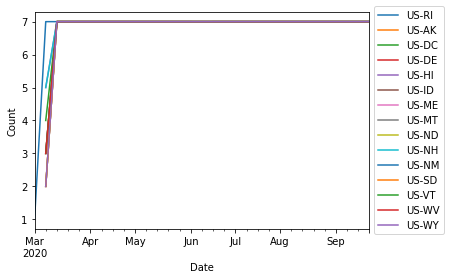


hospitalized_cumulative


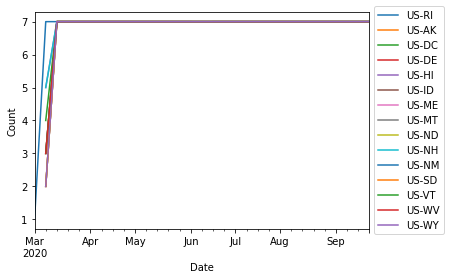


symptom:Adrenal crisis


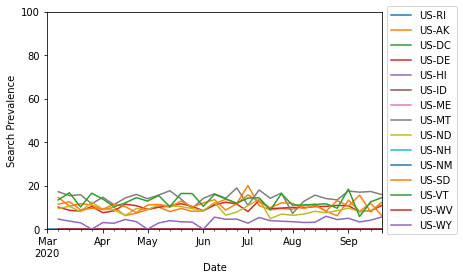


symptom:Ageusia


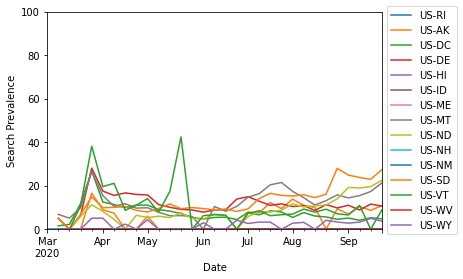


symptom:Allergic conjunctivitis


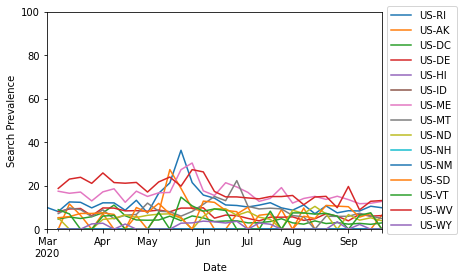


symptom:Amblyopia


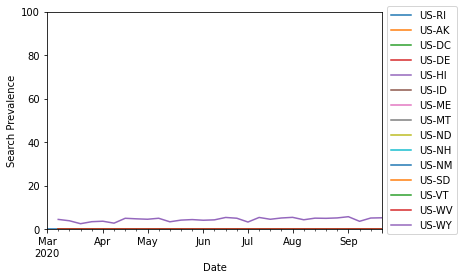


symptom:Amenorrhea


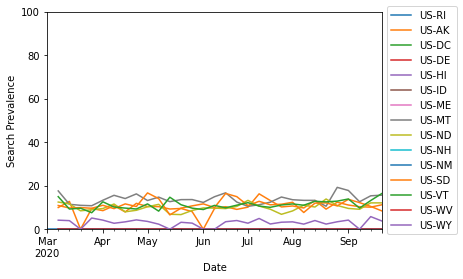


symptom:Angular cheilitis


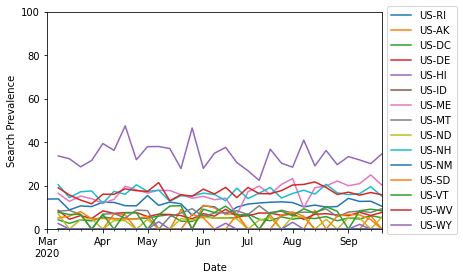


symptom:Anosmia


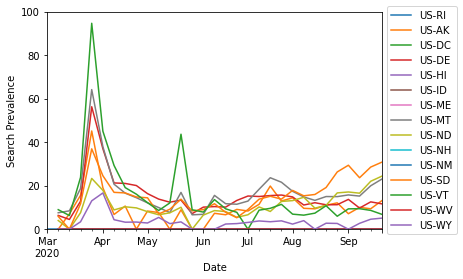


symptom:Aphonia


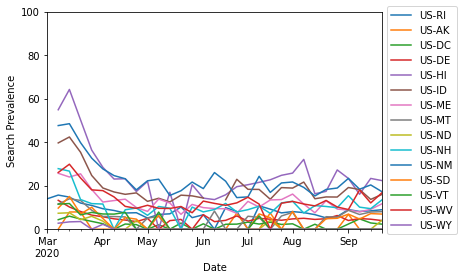


symptom:Ascites


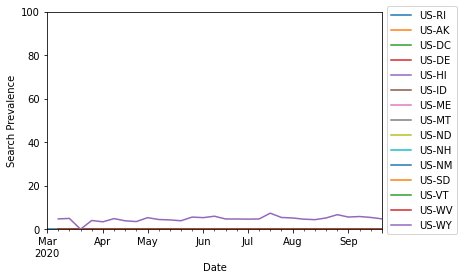


symptom:Asphyxia


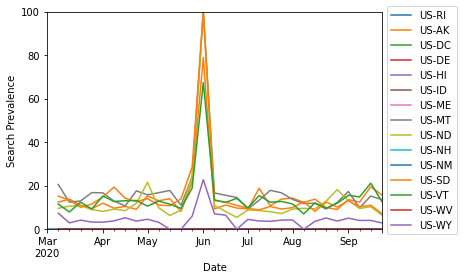


symptom:Atheroma


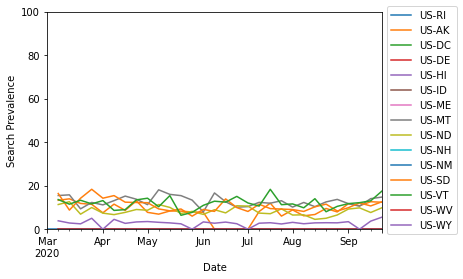


symptom:Auditory hallucination


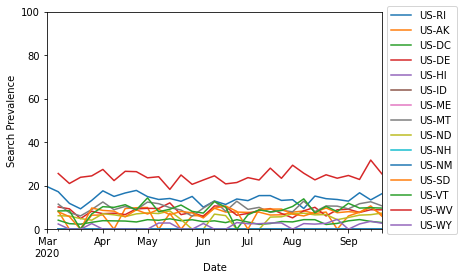


symptom:Balance disorder


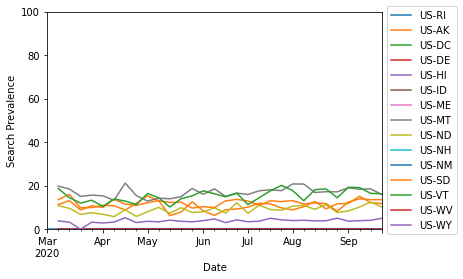


symptom:Beau's lines


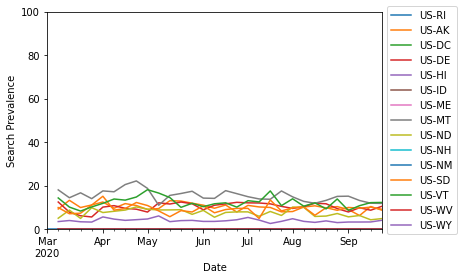


symptom:Bleeding on probing


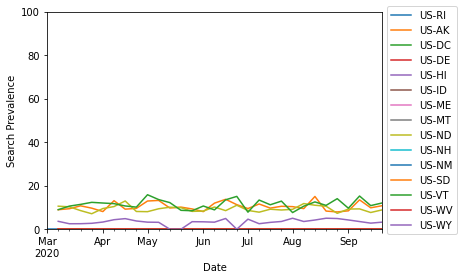


symptom:Burning Chest Pain


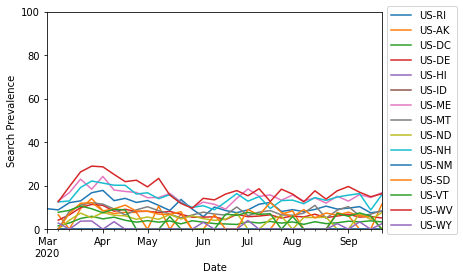


symptom:Burning mouth syndrome


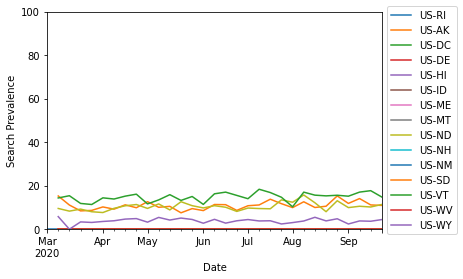


symptom:Cataplexy


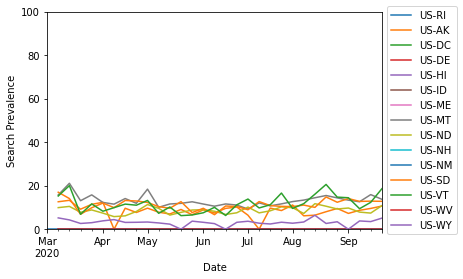


symptom:Chancre


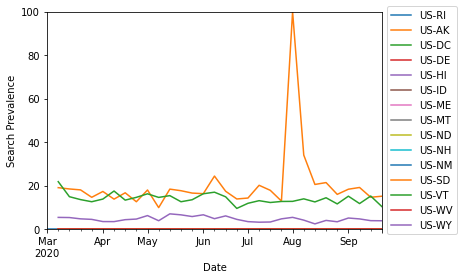


symptom:Chorea


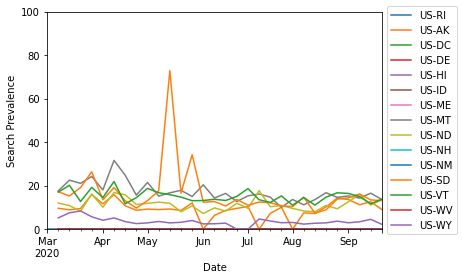


symptom:Cleft lip and cleft palate


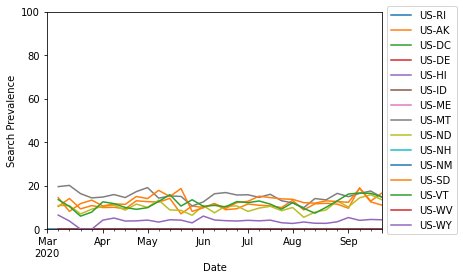


symptom:Clouding of consciousness


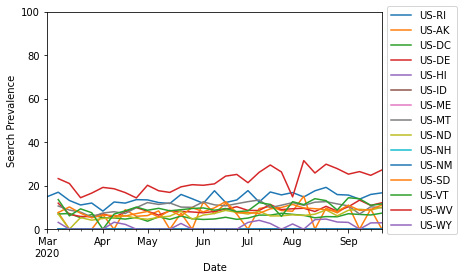


symptom:Compulsive hoarding


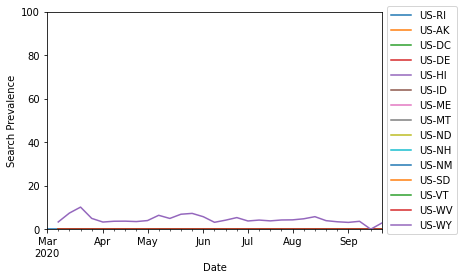


symptom:Crackles


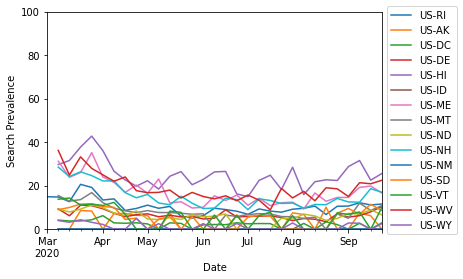


symptom:Crepitus


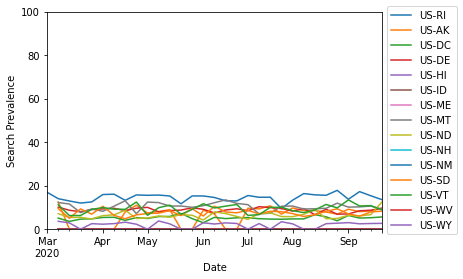


symptom:Croup


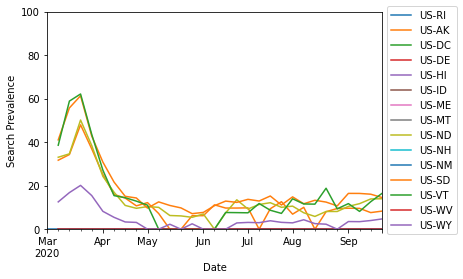


symptom:Cyanosis


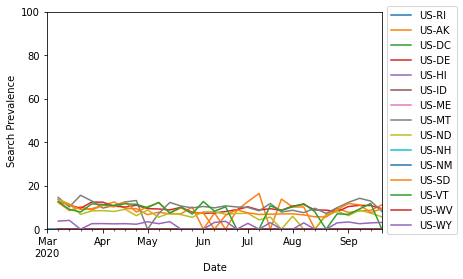


symptom:Depersonalization


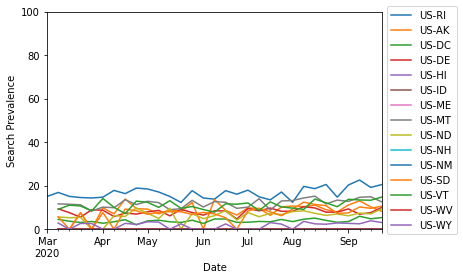


symptom:Developmental disability


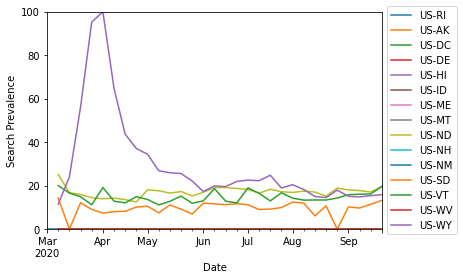


symptom:Dysautonomia


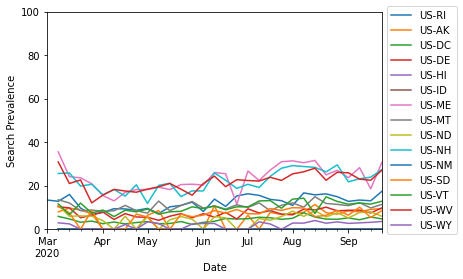


symptom:Dysgeusia


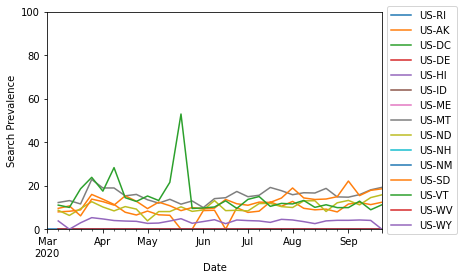


symptom:Dyspareunia


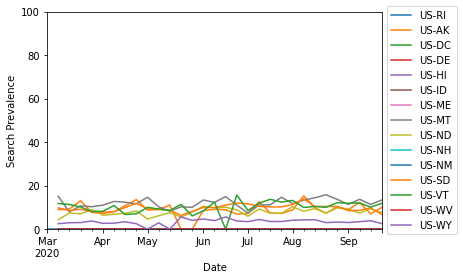


symptom:Dystonia


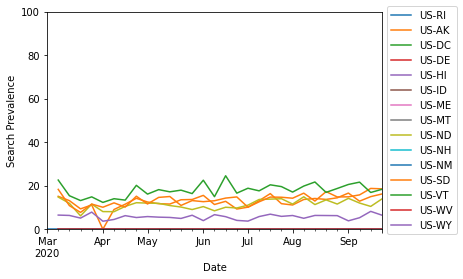


symptom:Dysuria


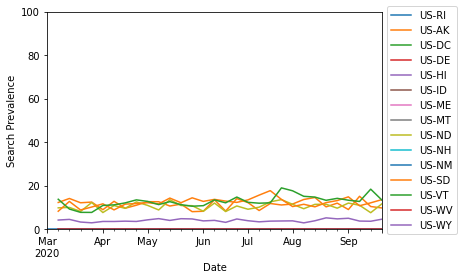


symptom:Epiphora


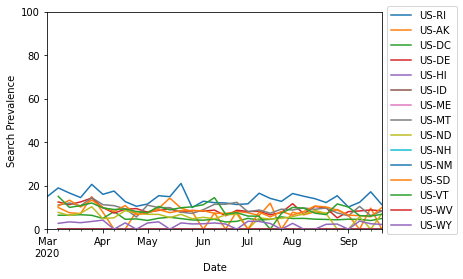


symptom:Esophagitis


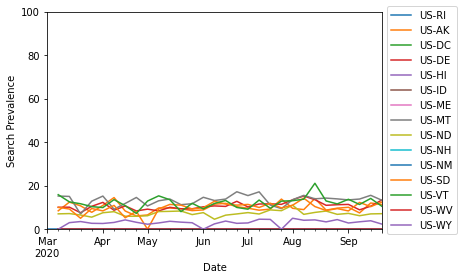


symptom:Eye pain


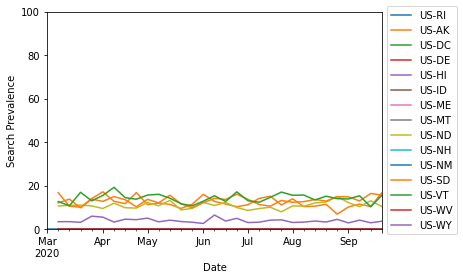


symptom:Facial swelling


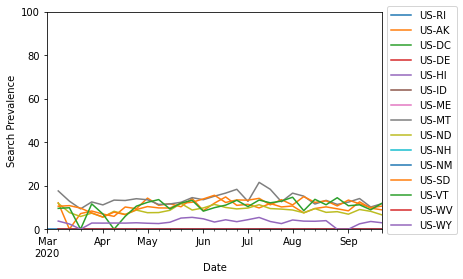


symptom:Fecal incontinence


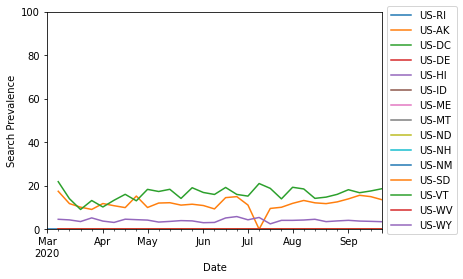


symptom:Fibrocystic breast changes


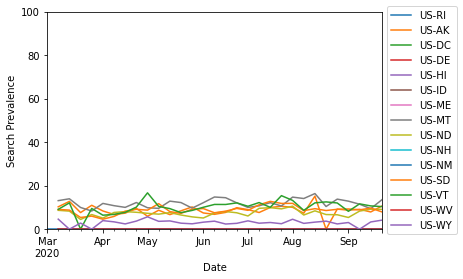


symptom:Focal seizure


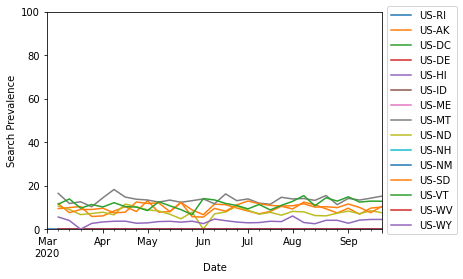


symptom:Gastroparesis


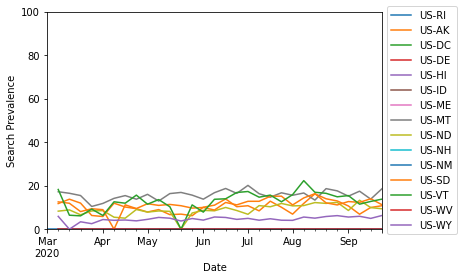


symptom:Generalized tonic–clonic seizure


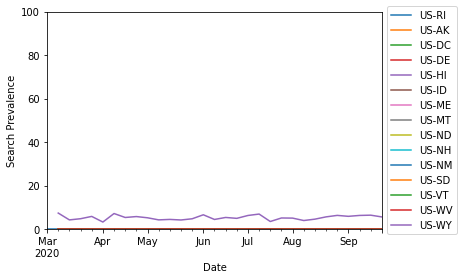


symptom:Gingival recession


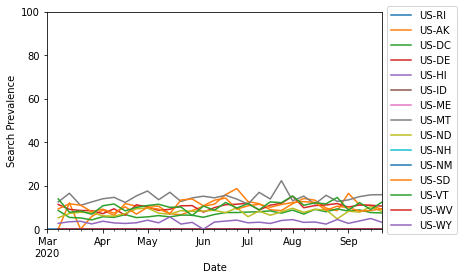


symptom:Globus pharyngis


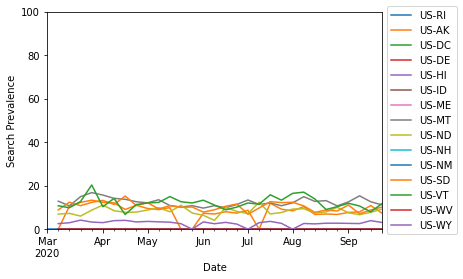


symptom:Goitre


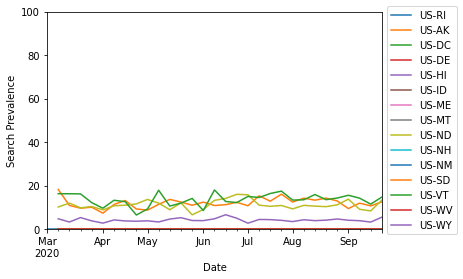


symptom:Grandiosity


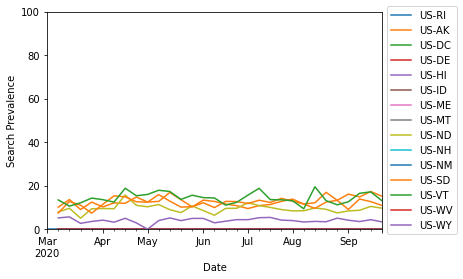


symptom:Granuloma


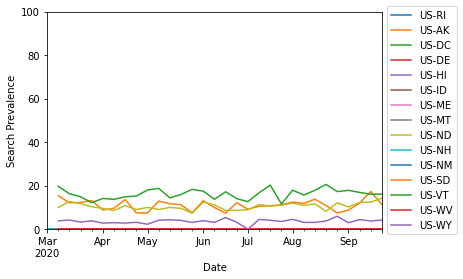


symptom:Heart murmur


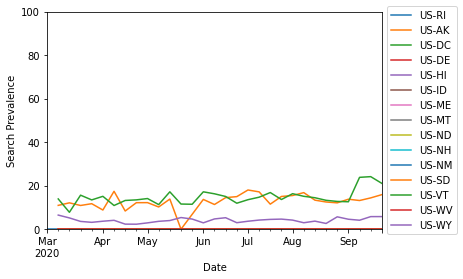


symptom:Hemolysis


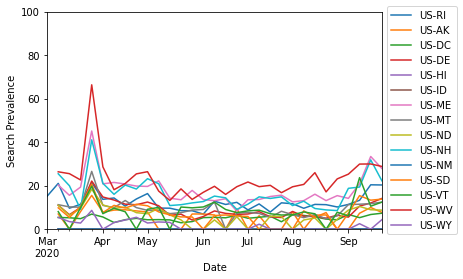


symptom:Hemoptysis


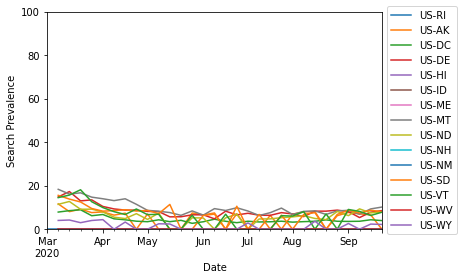


symptom:Hepatic encephalopathy


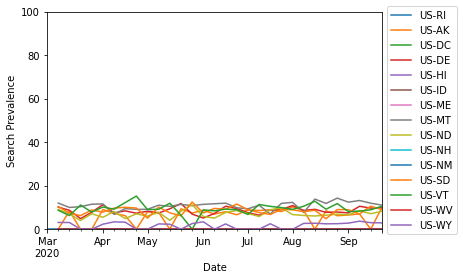


symptom:Hepatotoxicity


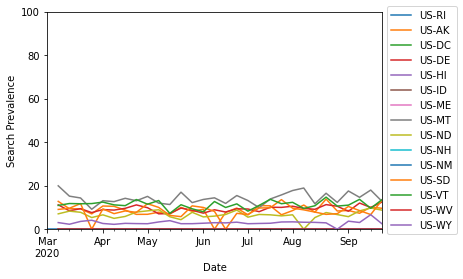


symptom:Hydrocephalus


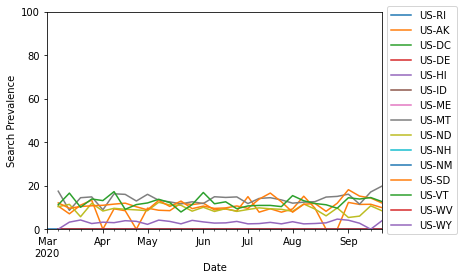


symptom:Hypercalcaemia


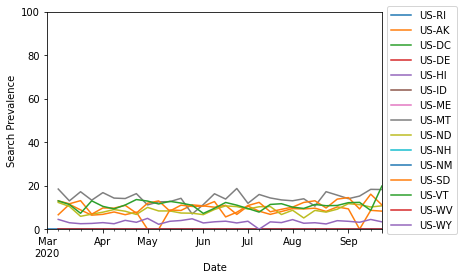


symptom:Hypercapnia


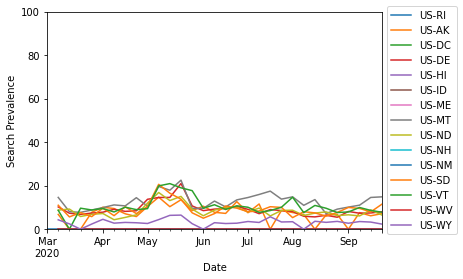


symptom:Hyperemesis gravidarum


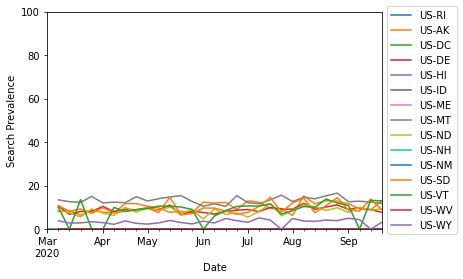


symptom:Hyperlipidemia


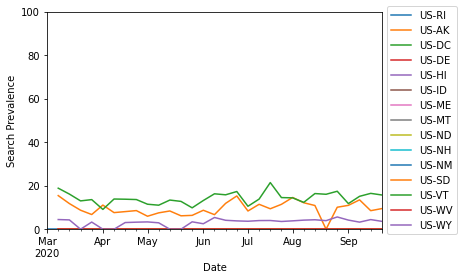


symptom:Hypersomnia


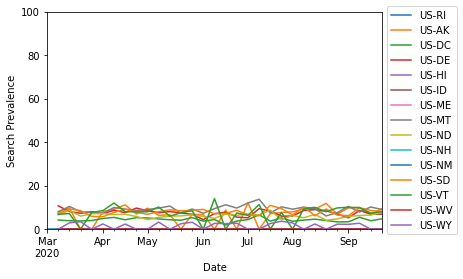


symptom:Hyperventilation


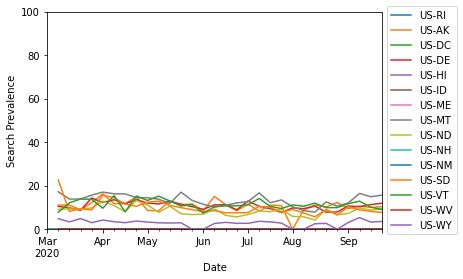


symptom:Hypocalcaemia


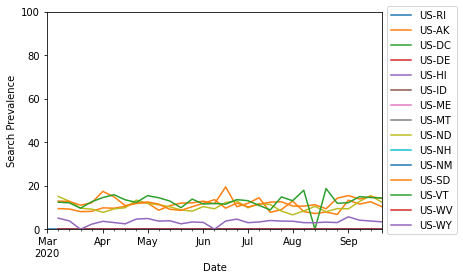


symptom:Hypochondriasis


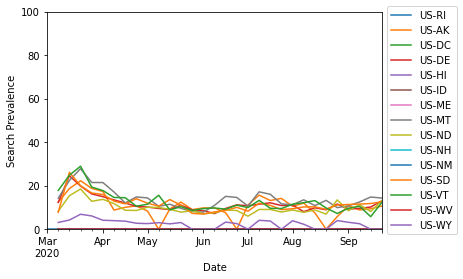


symptom:Hypomania


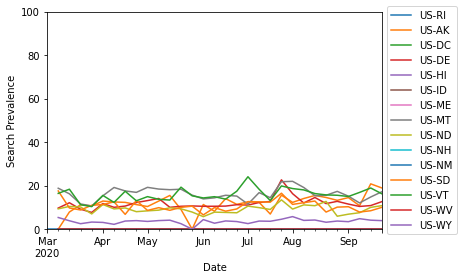


symptom:Impetigo


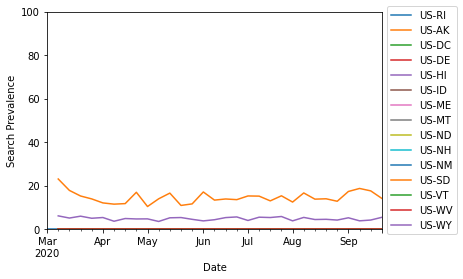


symptom:Intermenstrual bleeding


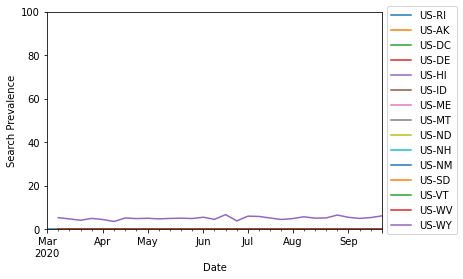


symptom:Kyphosis


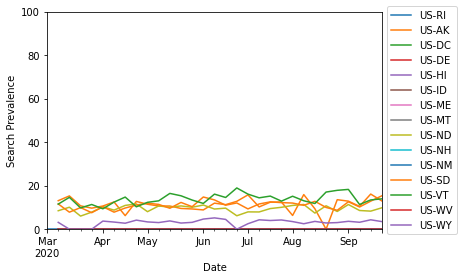


symptom:Laryngitis


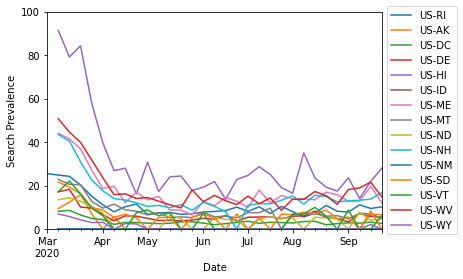


symptom:Leukorrhea


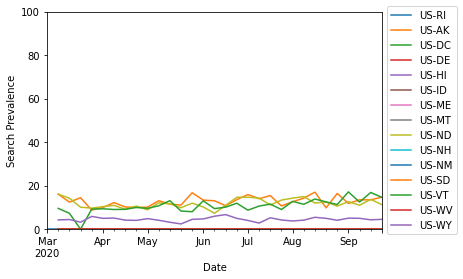


symptom:Malabsorption


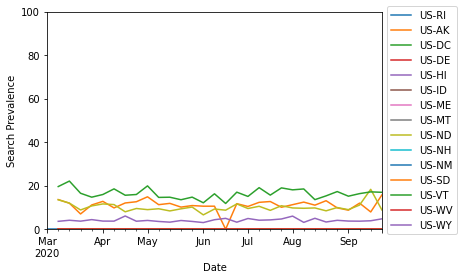


symptom:Male infertility


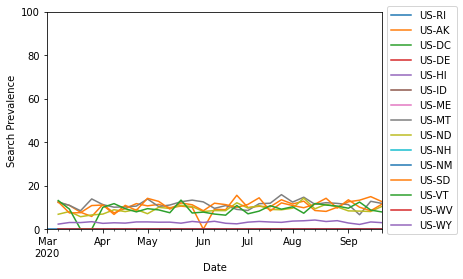


symptom:Mitral insufficiency


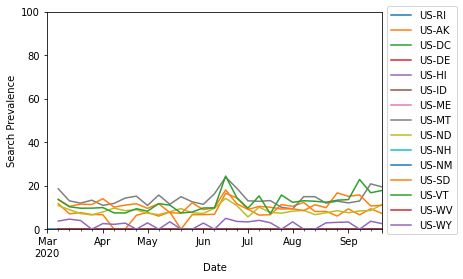


symptom:Muscle atrophy


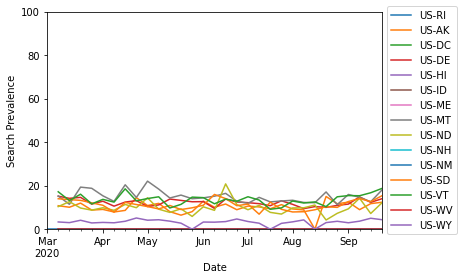


symptom:Myoclonus


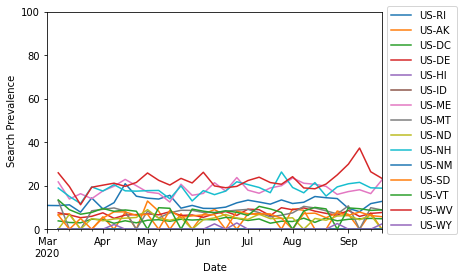


symptom:Nasal polyp


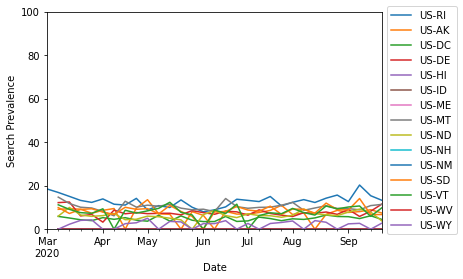


symptom:Neck mass


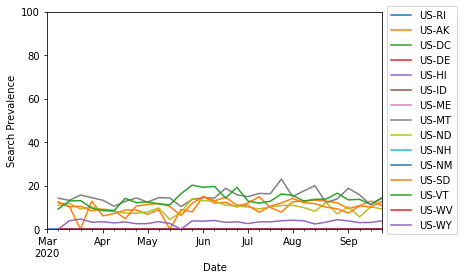


symptom:Neutropenia


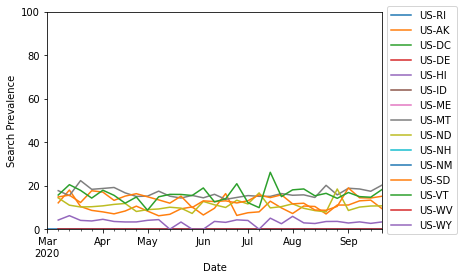


symptom:Night terror


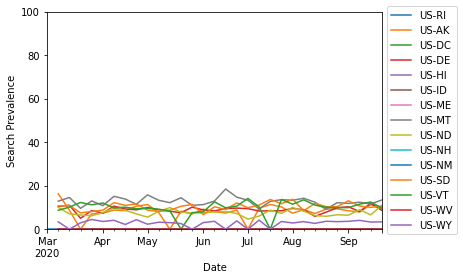


symptom:Nocturnal enuresis


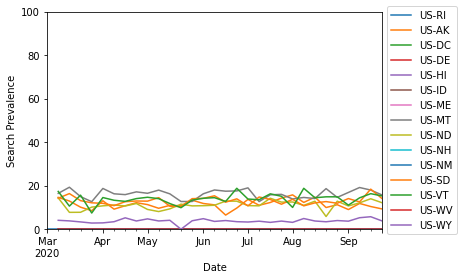


symptom:Nystagmus


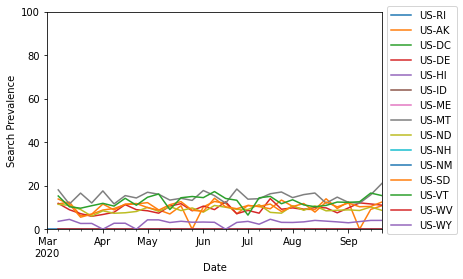


symptom:Onychorrhexis


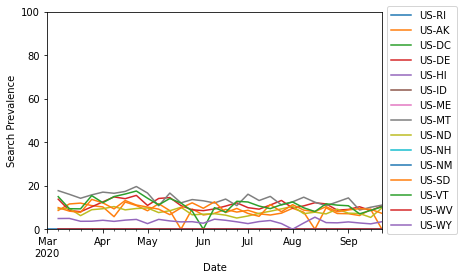


symptom:Osteopenia


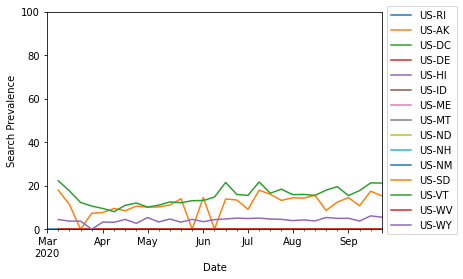


symptom:Osteophyte


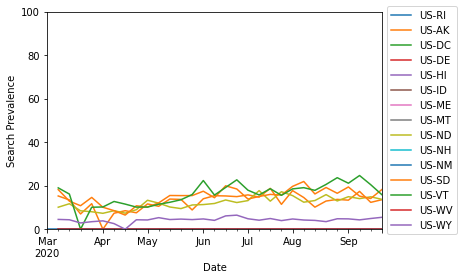


symptom:Papule


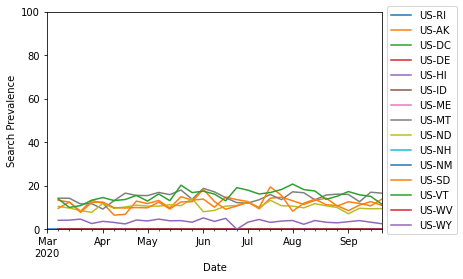


symptom:Paranoia


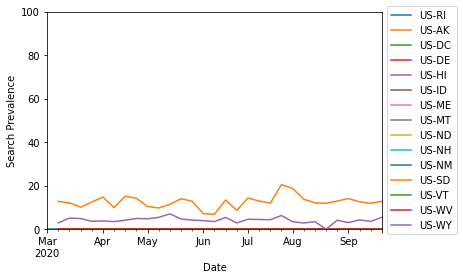


symptom:Pericarditis


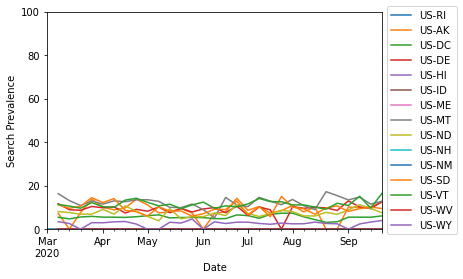


symptom:Petechia


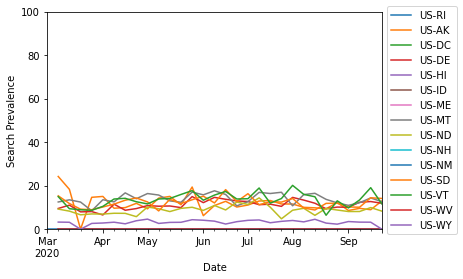


symptom:Photodermatitis


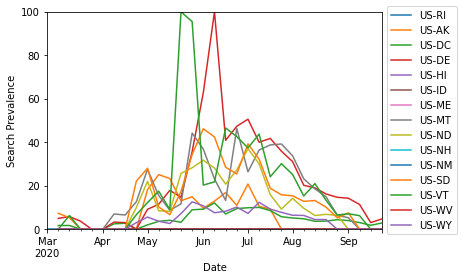


symptom:Photophobia


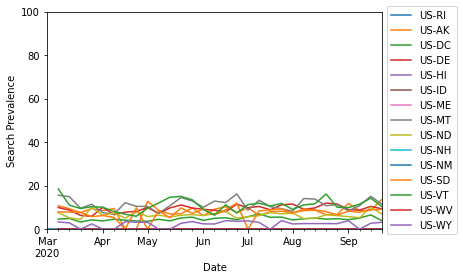


symptom:Photopsia


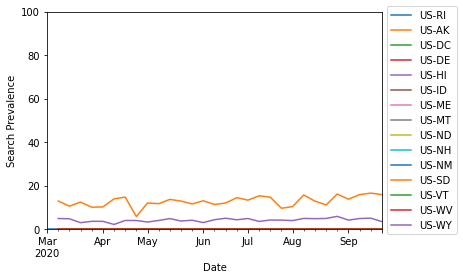


symptom:Pleurisy


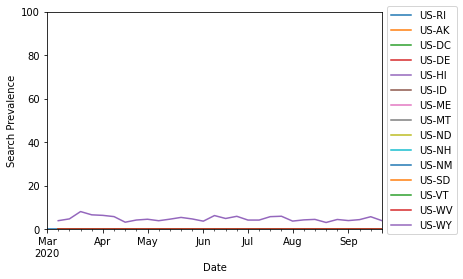


symptom:Polycythemia


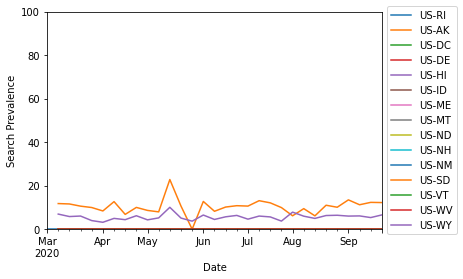


symptom:Polydipsia


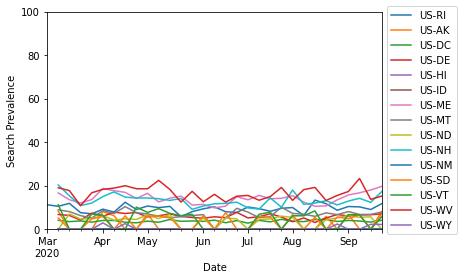


symptom:Polyuria


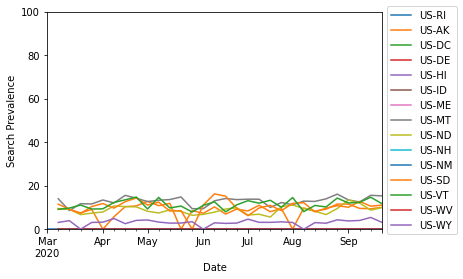


symptom:Postural orthostatic tachycardia syndrome


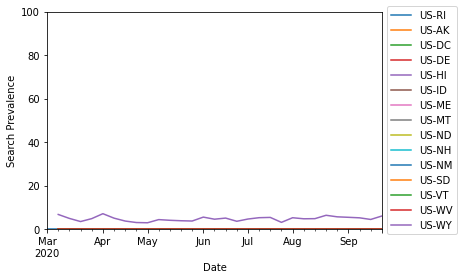


symptom:Ptosis


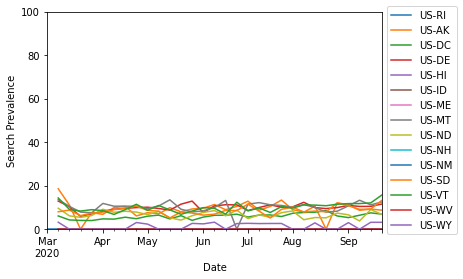


symptom:Pulmonary edema


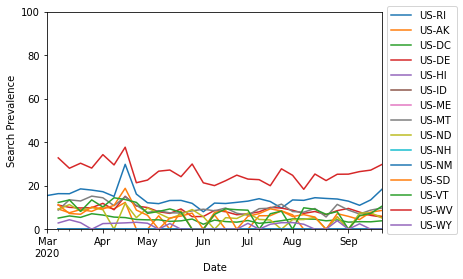


symptom:Rectal pain


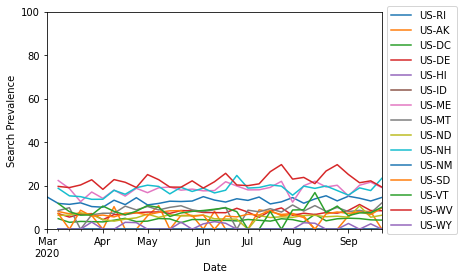


symptom:Rectal prolapse


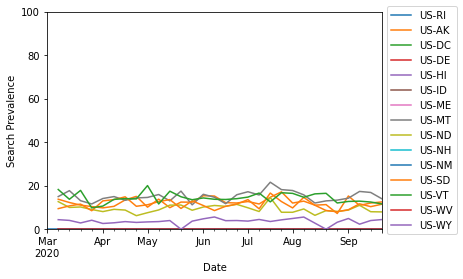


symptom:Renal colic


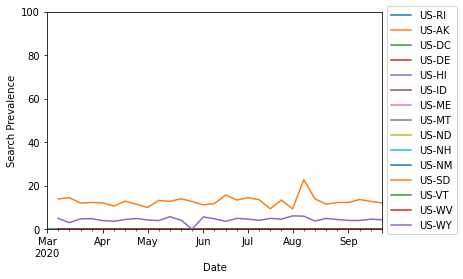


symptom:Rheum


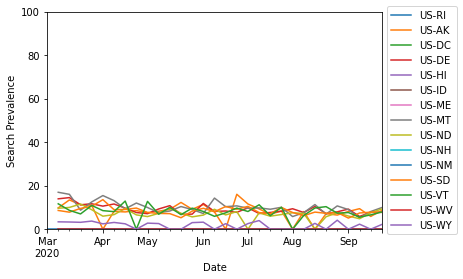


symptom:Round ligament pain


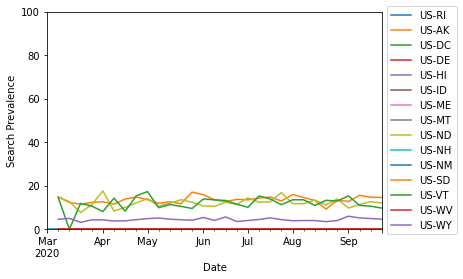


symptom:Rumination


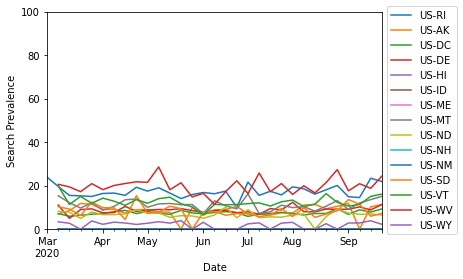


symptom:Sensitivity to sound


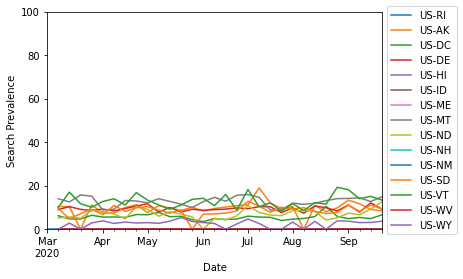


symptom:Shallow breathing


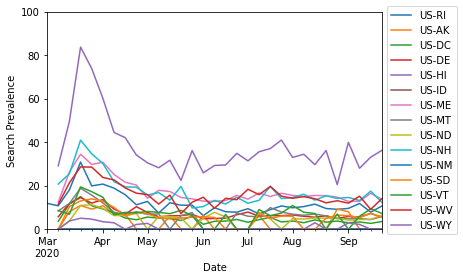


symptom:Spasticity


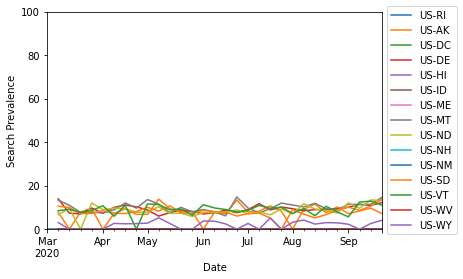


symptom:Splenomegaly


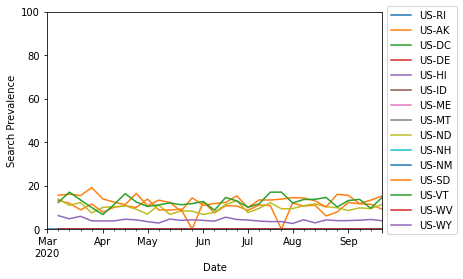


symptom:Sputum


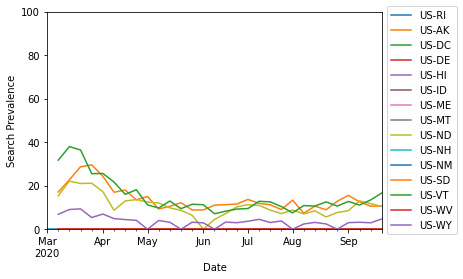


symptom:Stomach rumble


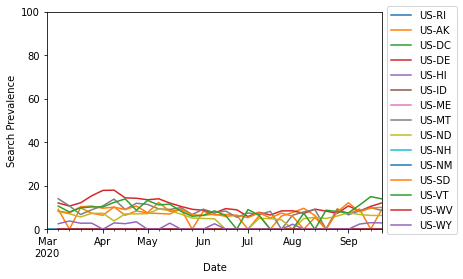


symptom:Stridor


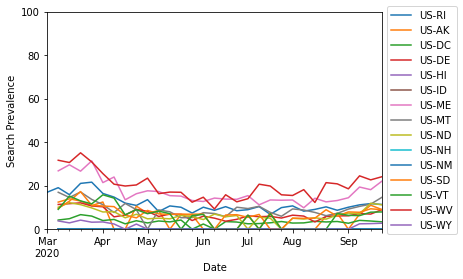


symptom:Subdural hematoma


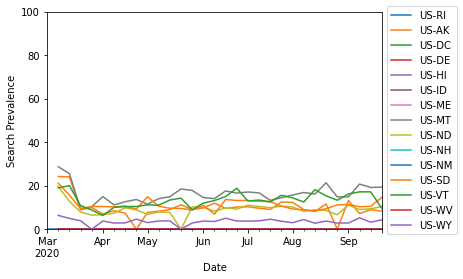


symptom:Tachypnea


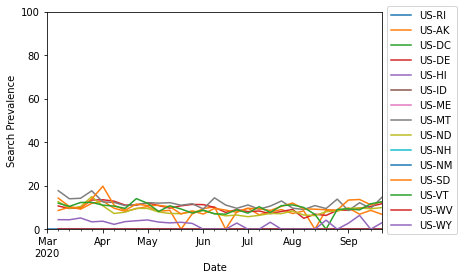


symptom:Tenderness


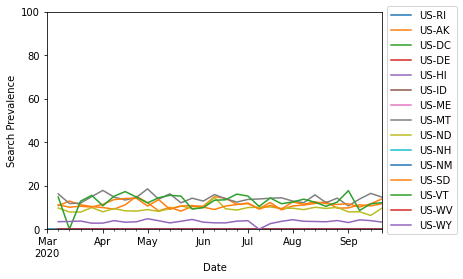


symptom:Thyroid nodule


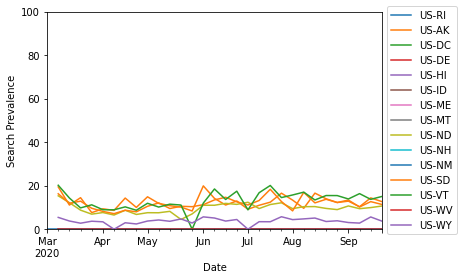


symptom:Trichoptilosis


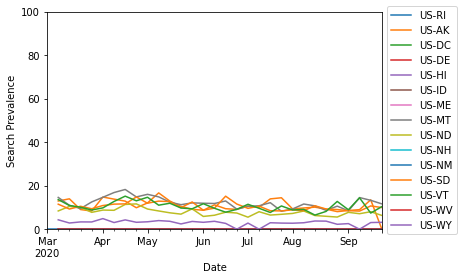


symptom:Upper respiratory tract infection


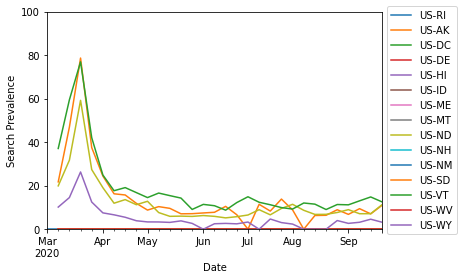


symptom:Urethritis


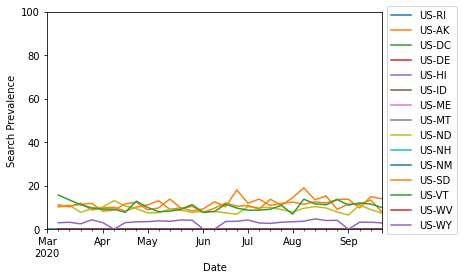


symptom:Urinary urgency


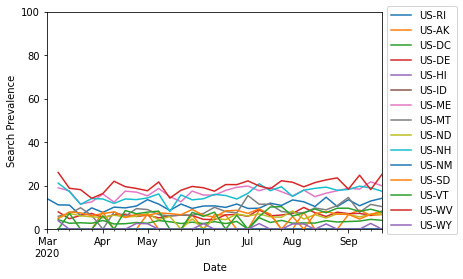


symptom:Vasculitis


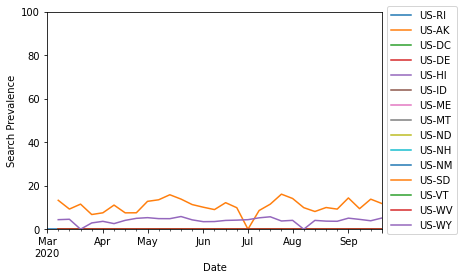


symptom:Ventricular fibrillation


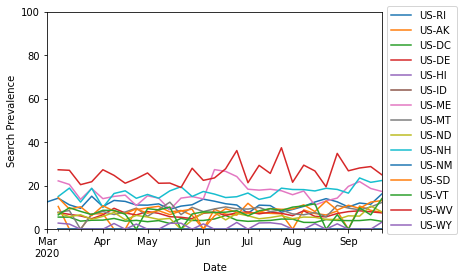


symptom:Viral pneumonia


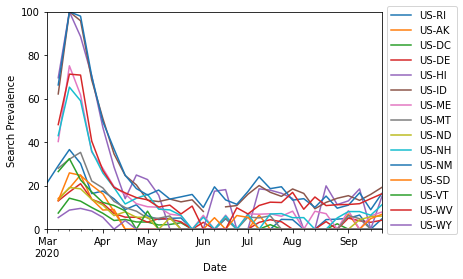


symptom:Yawn


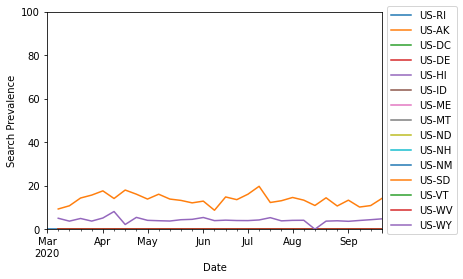


--- Full list of features ---
hospitalized_new
hospitalized_cumulative
symptom:Adrenal crisis
symptom:Ageusia
symptom:Allergic conjunctivitis
symptom:Amblyopia
symptom:Amenorrhea
symptom:Angular cheilitis
symptom:Anosmia
symptom:Aphonia
symptom:Ascites
symptom:Asphyxia
symptom:Atheroma
symptom:Auditory hallucination
symptom:Balance disorder
symptom:Beau's lines
symptom:Bleeding on probing
symptom:Burning Chest Pain
symptom:Burning mouth syndrome
symptom:Cataplexy
symptom:Chancre
symptom:Chorea
symptom:Cleft lip and cleft palate
symptom:Clouding of consciousness
symptom:Compulsive hoarding
symptom:Crackles
symptom:Crepitus
symptom:Croup
symptom:Cyanosis
symptom:Depersonalization
symptom:Developmental disability
symptom:Dysautonomia
symptom:Dysgeusia
symptom:Dyspareunia
symptom:Dystonia
symptom:Dysuria
symptom:Epiphora
symptom:Esophagitis
symptom:Eye pain
symptom:Facial swelling
symptom:Fecal incontinence
symptom:Fibrocystic breast changes
symptom:Focal seizure
symptom:Gastroparesis
sym

In [8]:
# Current visualization strategy: plot features over time (symptom/hospitalization stat) separately from
# each other, but aggregating all regions for each feature

# Choose set of features to plot (ex. features = ['hospitalized_new', 'symptom:Balance disorder', 'symptom:Rheum'])
# Graphing all features for now (df.columns.values), takes several minutes
features = df.columns.values

unstacked = df.unstack(level=[1])
for feature in features:
    print(feature)
    p = unstacked[feature].plot()
    p.set_xlabel("Date")
    if feature.startswith('symptom'):
        plt.ylim((0,100)) # search prevalence ranges from 0 to 100
        p.set_ylabel("Search Prevalence")
    else:
        p.set_ylabel("Count")
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    plt.show()
    print()
    
print("--- Full list of features ---")
for feature in df.columns.values:
    print(feature)

###2.2 Use Principal Component Analysis (PCA) to reduce the data dimensionality.

###2.3 Explore using a clustering method (k-means) to evaluate possible groups in the search trends dataset. Do the clusters remain consistent for raw as well as PCA-reduced data?

## Task 3: Supervised Learning

###3.1 Split the data (region): keep all data from some regions in the validation set and train on the rest (keep 80% regions in training set and 20% in validation set, doing this multiple times to estimate cross-validation results).

###3.2 Split the data (time): keep data for the last couple of timepoints (keep data after `2020-08-10') from all regions in the validation set and train on the rest of the data.

### 3.3 Supervised Learning: KNN (region) (5-fold cross-validation)

###3.4 Supervised Learning: KNN (time)

###3.5 Supervised Learning: Decision Tree (region) (5-fold cross-validation)

###3.6 Supervised Learning: Decision Tree (time)

### 3.7 **(Optional)** Explore other prediction strategies. For example, one strategy could be to learn separate models for predicting hospitalization in each region or cluster from Task 2.